In [10]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [3]:
corona = pd.read_csv('data/WHO_COVID19.csv')

In [4]:
# 코로나 데이터의 Date 컬럼의 데이터 타입을 변경.
corona.Date_reported = pd.to_datetime(corona['Date_reported'], format='%Y-%m-%d')

In [15]:
corona

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24 00:00:00+00:00,AF,Afghanistan,EMRO,1,1,0,0
1,2020-02-25 00:00:00+00:00,AF,Afghanistan,EMRO,0,1,0,0
2,2020-02-26 00:00:00+00:00,AF,Afghanistan,EMRO,0,1,0,0
3,2020-02-27 00:00:00+00:00,AF,Afghanistan,EMRO,0,1,0,0
4,2020-02-28 00:00:00+00:00,AF,Afghanistan,EMRO,0,1,0,0
...,...,...,...,...,...,...,...,...
20425,2020-06-04 00:00:00+00:00,ZW,Zimbabwe,AFRO,16,222,0,4
20426,2020-06-05 00:00:00+00:00,ZW,Zimbabwe,AFRO,0,222,0,4
20427,2020-06-06 00:00:00+00:00,ZW,Zimbabwe,AFRO,43,265,0,4
20428,2020-06-07 00:00:00+00:00,ZW,Zimbabwe,AFRO,14,279,0,4


In [5]:
# 데이터를 2, 3, 4, 5, 6월로 나눈다.
mask2 = (corona['Date_reported'] >= '2020-02-01') & (corona['Date_reported'] < '2020-03-01')
mask3 = (corona['Date_reported'] >= '2020-03-01') & (corona['Date_reported'] < '2020-04-01')
mask4 = (corona['Date_reported'] >= '2020-04-01') & (corona['Date_reported'] < '2020-05-01')
mask5 = (corona['Date_reported'] >= '2020-05-01') & (corona['Date_reported'] < '2020-06-01')
mask6 = (corona['Date_reported'] >= '2020-06-01')

In [6]:
corona2 = corona.loc[mask2]
corona3 = corona.loc[mask3]
corona4 = corona.loc[mask4]
corona5 = corona.loc[mask5]
corona6 = corona.loc[mask6]

In [7]:
# 각 월의 New_cases (확진자) New_deaths (사망자)의 합을 구한다.
corona2_data = corona2[['New_cases', 'New_deaths']].sum()
corona3_data = corona3[['New_cases', 'New_deaths']].sum()
corona4_data = corona4[['New_cases', 'New_deaths']].sum()
corona5_data = corona5[['New_cases', 'New_deaths']].sum()
corona6_data = corona6[['New_cases', 'New_deaths']].sum()

In [8]:
corona_data = pd.DataFrame(
    data = {
        'Cases': [corona2_data.New_cases, corona3_data.New_cases, corona4_data.New_cases, corona5_data.New_cases, corona6_data.New_cases],
        'Deaths': [corona2_data.New_deaths, corona3_data.New_deaths, corona4_data.New_deaths, corona5_data.New_deaths, corona6_data.New_deaths]
    },

    index = ['Feb', 'Mar', 'Apr', 'May', 'Jun'],
    columns = ['Cases', 'Deaths']
)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

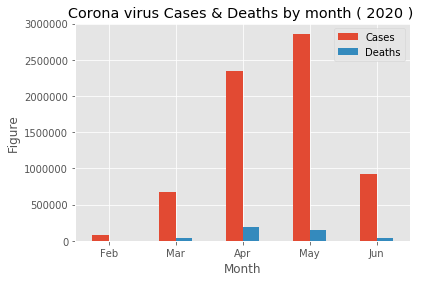

In [9]:
matplotlib.style.use('ggplot')
corona_data.plot(kind='bar')
plt.title('Corona virus Cases & Deaths by month ( 2020 ) ')
plt.xlabel('Month')
plt.ylabel('Figure')
plt.xticks(rotation=0, horizontalalignment='center')